Dataset can be downloaded from : https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4047,2434-EEVDB,Female,0,Yes,No,64,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Two year,Yes,Credit card (automatic),94.60,5948.7,No
530,8067-NIOYM,Female,0,Yes,Yes,24,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),21.10,490.65,No
3752,0412-UCCNP,Male,0,No,No,55,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,Yes,Electronic check,59.20,3175.85,No
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
2988,6295-OSINB,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,109.65,7880.25,No


In [3]:
#Since customer id will not be useful, we will drop that column
df.drop('customerID', axis = 'columns', inplace = True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
#First TotalCharges will be converted to numbers from strings
#But there are " " like strings. We will ignore those so it doesn't give us errors
#It will convert " " to NA. isnull() tells us if they have " " or not.
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()] # it will return false ones

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
#Checking specific row. Stands for integer location (iloc)
df.iloc[488] 

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [9]:
df.iloc[488]['TotalCharges'] #it is blank

' '

In [10]:
df1 = df[df.TotalCharges!=' '] #store the ones that are not blank
df1.shape

(7032, 20)

In [11]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges) #Now it wont give any error

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
df1.TotalCharges.dtypes #Conversion is successfully done. It became float

dtype('float64')

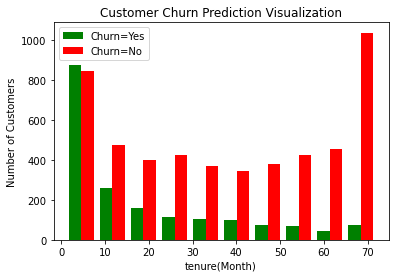

In [13]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure #Tenure info of the people who are not leaving
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure#Tenure info of the people who are leaving


plt.xlabel("tenure(Month)")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label = ['Churn=Yes', 'Churn=No'])#Histogram
plt.legend()

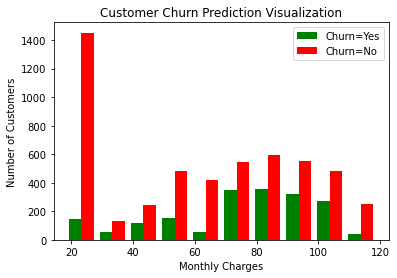

In [14]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges #MonthlyCharges info of the people who are not leaving
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges#MonthlyCharges info of the people who are leaving


plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], color = ['green', 'red'], label = ['Churn=Yes', 'Churn=No'])#Histogram
plt.legend()

In [15]:
for column in df:
    print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [16]:
for column in df:
    print(f'{column} : {df[column].unique()}') #Prints unique values for each column

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [17]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [18]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
#For better labeling we replace. Also if inplace is true, it modifies data as well.Other wise you have to assign it to df1 again
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True) 

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [20]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace = True) #Changing Yes/No to 1/0

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [22]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [23]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace = True)

In [24]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [25]:
 #Creates one hot encoding for desired columns
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
df2.sample(4) #Column numbers increased

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6178,1,1,1,0,54,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2141,0,0,1,1,16,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3308,1,0,1,0,15,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4698,1,1,1,0,66,1,1,0,1,1,...,1,0,0,0,0,1,1,0,0,0


In [27]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [28]:
for col in df2:
    print(f'{col}: {df2[col].unique()}') #All float numbers are between 0-1

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [29]:
#Data cleaning is over. Now time for training.
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [30]:
#We split training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [31]:
X_train.shape

(5625, 26)

In [32]:
X_test.shape

(1407, 26)

In [33]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [34]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight=weights)
        
    print(model.evaluate(X_test, y_test))
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [36]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.5258 - accuracy: 0.7147
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.7954
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4194 - accuracy: 0.7986
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8037
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8053
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8050
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8096
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8071
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8060
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4037 - accura

176/176 [==============================] - 0s 3ms/step - loss: 0.3566 - accuracy: 0.8283
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3575 - accuracy: 0.8309
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8306
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3545 - accuracy: 0.8315
Epoch 85/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3552 - accuracy: 0.8297
Epoch 86/100
176/176 [==============================] - ETA: 0s - loss: 0.3557 - accuracy: 0.82 - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8304
Epoch 87/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3550 - accuracy: 0.8334
Epoch 88/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.8322
Epoch 89/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3532 - accuracy: 0.8325
Epoch 90/100
176/176 [==============================]

In [37]:
#Goal is to improve f1 score and precisions so it can give good results for both classes
count_class_0, count_class_1 = df1.Churn.value_counts()

#Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [38]:
df_class_0.shape

(5163, 27)

In [39]:
df_class_1.shape #There is imbalance

(1869, 27)

In [40]:
#We will undersample class 0
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0) #We created new dataset by concatenating

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
1    1869
0    1869
Name: Churn, dtype: int64


In [41]:
X = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)#Stratify will make sure we have balanced samples.y_train and y_test will have balanced samples

In [42]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [43]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6451 - accuracy: 0.6368
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5354 - accuracy: 0.7478
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5056 - accuracy: 0.7552
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4990 - accuracy: 0.7569
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4952 - accuracy: 0.7555
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4914 - accuracy: 0.7612
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.7582
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.7642
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.7649
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4806 - accuracy: 0.7686
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.4018 - accuracy: 0.8124
Epoch 83/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4014 - accuracy: 0.8124
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4012 - accuracy: 0.8140
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3985 - accuracy: 0.8144
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3989 - accuracy: 0.8114
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3991 - accuracy: 0.8104
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8167
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3983 - accuracy: 0.8137
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3958 - accuracy: 0.8130
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.8117
Epoch 92/100


# Method2: Oversampling

In [44]:
count_class_0, count_class_1

(5163, 1869)

In [45]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True) #Picks random samples and duplicates them
df_test_over = pd.concat([df_class_0,df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
1    5163
0    5163
Name: Churn, dtype: int64


In [46]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [47]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [48]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5469 - accuracy: 0.7213
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4941 - accuracy: 0.7592
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4866 - accuracy: 0.7622
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4832 - accuracy: 0.7648
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4787 - accuracy: 0.7661
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4778 - accuracy: 0.7677
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4743 - accuracy: 0.7674: 0s - loss: 0
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4728 - accuracy: 0.7695
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4711 - accuracy: 0.7738
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0

259/259 [==============================] - 1s 3ms/step - loss: 0.3858 - accuracy: 0.8257
Epoch 82/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3863 - accuracy: 0.8245
Epoch 83/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3861 - accuracy: 0.8247
Epoch 84/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3843 - accuracy: 0.8265
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3828 - accuracy: 0.8255
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3822 - accuracy: 0.8298
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3812 - accuracy: 0.8258
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3809 - accuracy: 0.8291
Epoch 89/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3808 - accuracy: 0.8305
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3818 - accuracy: 

# Method3: SMOTE 

In [49]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [50]:
y.value_counts() #It is imbalanced

0    5163
1    1869
Name: Churn, dtype: int64

In [51]:
#pip install imbalanced-Learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [53]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [54]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [55]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5330 - accuracy: 0.7475
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4723 - accuracy: 0.7755
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4635 - accuracy: 0.7798
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4587 - accuracy: 0.7821
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4542 - accuracy: 0.7834
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4501 - accuracy: 0.7895
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4455 - accuracy: 0.7907
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4439 - accuracy: 0.7923
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4391 - accuracy: 0.7948
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4373 - accura

259/259 [==============================] - 1s 2ms/step - loss: 0.3416 - accuracy: 0.8517
Epoch 82/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8505
Epoch 83/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3401 - accuracy: 0.8488
Epoch 84/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3417 - accuracy: 0.8512
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 0.8527
Epoch 86/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3372 - accuracy: 0.8548
Epoch 87/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3359 - accuracy: 0.8545: 0s - loss: 0.332
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3357 - accuracy: 0.8521
Epoch 89/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.8542
Epoch 90/100
259/259 [==============================] - 1s 2ms/step - loss: 0

# Method4: Use of Ensemble with undersampling

In [56]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [57]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [59]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [61]:
4130/3

1376.6666666666667

In [62]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [63]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [64]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [67]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)
    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [69]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.7154
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.7605
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.7632
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.7659
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7645
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.7732
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4743 - accuracy: 0.7712
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4722 - accuracy: 0.7742
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4721 - accuracy: 0.7749
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8140
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.8191
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4066 - accuracy: 0.8134
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.8137
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8144
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4047 - accuracy: 0.8157
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8147
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4039 - accuracy: 0.8137
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4036 - accuracy: 0.8194
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4026 - accuracy: 0.8221
Epoch 93/100


In [70]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6441 - accuracy: 0.6605
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5239 - accuracy: 0.7525
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5001 - accuracy: 0.7592
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4915 - accuracy: 0.7619
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4856 - accuracy: 0.7632
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4810 - accuracy: 0.7649
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4776 - accuracy: 0.7666
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4751 - accuracy: 0.7656
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4732 - accuracy: 0.7699
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4695 - accuracy: 0.7702
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.3908 - accuracy: 0.8134
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8127
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8144
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8221
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3856 - accuracy: 0.8227
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3838 - accuracy: 0.8181
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3855 - accuracy: 0.8184
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.8177
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3821 - accuracy: 0.8174
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3821 - accuracy: 0.8187
Epoch 93/100


In [75]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.7047
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.5045 - accuracy: 0.7620
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4888 - accuracy: 0.7613
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4824 - accuracy: 0.7666
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.7723
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4755 - accuracy: 0.7712
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4729 - accuracy: 0.7734
Epoch 8/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4704 - accuracy: 0.7731
Epoch 9/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4711 - accuracy: 0.7761
Epoch 10/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4656 - accuracy: 0.7734
Epoch 11/

83/83 [==============================] - 0s 3ms/step - loss: 0.3949 - accuracy: 0.8194
Epoch 83/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3935 - accuracy: 0.8201
Epoch 84/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3928 - accuracy: 0.8205
Epoch 85/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3919 - accuracy: 0.8209
Epoch 86/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3896 - accuracy: 0.8250
Epoch 87/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3888 - accuracy: 0.8209
Epoch 88/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.8220
Epoch 89/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3890 - accuracy: 0.8235
Epoch 90/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3887 - accuracy: 0.8292
Epoch 91/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3861 - accuracy: 0.8250
Epoch 92/100


In [76]:
#Majority Vote
vote1 = 1
vote2 = 1
vote3 = 1

vote1 + vote2 + vote3

3

In [78]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [79]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1033
           1       0.52      0.75      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.75      0.76      1407

